## درس چهارم:
##  Keras Functional API


در اینجا به جای لایه فولی کانکتت از لایه کاوشنال و از فانکشنال ی پی ای استفاده خواهیم نمود

In [1]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

data=np.load('/content/drive/My Drive/Colab Notebooks/Keras/mnist.npz')

In [3]:
#myModle3.compile(optimizer=SGD(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])
from tensorflow import keras
opt = keras.optimizers.Adam()
opt1 = keras.optimizers.SGD(lr=0.001)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [4]:
def plot_history2(net_history):
  history = net_history.history# برای ساخت دیکشنری
  #********************

  #*****************
  fig, ax = plt.subplots()
  accuracy =history ['accuracy']
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  line_up, = ax.plot(accuracy, label='accuracy')
  if len(history.keys()) > 2 :
    accuracy_val =history ['val_accuracy']
    line_down, = ax.plot(accuracy_val, label='accuracy_val')
    ax.legend(handles=[line_up, line_down])
  plt.figure()
  
  fig, ax = plt.subplots()
  losses =history['loss']
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  line_up, = ax.plot(losses , label='loss')
  if len(history.keys()) > 2 :
    losses_val =history['val_loss']
    line_down, = ax.plot(losses_val, label='losses_val')
    ax.legend(handles=[line_up, line_down])

In [5]:
train_images,train_labels=data['x_train'],np.array(data['y_train'])
test_images,test_labels=data['x_test'],np.array(data['y_test'])
print("tarin:",train_images.shape,"test_images:",test_images.shape)

tarin: (60000, 28, 28) test_images: (10000, 28, 28)


# در مدل فولی کانکتت ما داده ها ا به یک وکتور با 784 بعد تبدیل کردیم ولی در لایه کانولوشان داده های ورودی باید به همان شکل تصویر باشد و یعنی همان 28*28 و به همراه یک بعد دیگر یعنی 1 که همان تعداد کانال های ما می باشد و 1 به این علت که تصاویر سایه و سفید می باشد

##  دقت گردد در مدل های کانوشنال بعد کانال حتما باید داشته باشند در فولی کانکت ورودی حتما باید وکتور باشد

In [6]:
# X_train=train_images.reshape(60000,28 ,28 ,1) # دستور ریشیپ ابعاد را برای ساخت بردار تعریف می کنسم
X_train=train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
X_train.shape

(60000, 28, 28, 1)

In [7]:
# X_test=test_images.reshape(10000,28,28,1) # دستور ریشیپ ابعاد را برای ساخت بردار تعریف می کنسم
X_test=test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)
X_test.shape

(10000, 28, 28, 1)

In [8]:
X_train=X_train.astype('float32') #(np.float32)
X_test=X_test.astype('float32') #(np.float32)
X_train=X_train/255
X_test=X_test/255


In [9]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels)
Y_test = np_utils.to_categorical(test_labels)
print('train_labels[2]:',train_labels[2],'\n','Y_train[2]:',Y_train[2],'\n','\n')
print('test_labels[2]:','\n',test_labels[2],'Y_test[2]:',Y_test[2])

train_labels[2]: 4 
 Y_train[2]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
 

test_labels[2]: 
 1 Y_test[2]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


#### پایان مرحله آماده سازی داده و شروع ساخت مدل

In [10]:
from keras import layers 
from keras.models import Model
import keras

In [11]:
print('train_images.shape[0]=',train_images.shape[0])
print('train_images.shape[1]=',train_images.shape[1])
print('train_images.shape[2]=',train_images.shape[2])

train_images.shape[0]= 60000
train_images.shape[1]= 28
train_images.shape[2]= 28


## در روش فانکشنال در ابتدا به جای ساخت مدل می بایست لایه ها  را ساخت

## ساخت لایه ها
# دقت شود برخلاف سکوشنال باید در هر لایه ورودی را به هر لایه معرفی کنیم که ورودی هر لایه خروجی لایه بالاتر می باشد 

#myInput= Input(shape=(28,28,1))
myInput1=Input(shape=(train_images.shape[1],train_images.shape[2],1))#shap=(28,28,1) # به عنوان ورودی هم فقط باید سایز یا همان شیپ داده ورودی را بدهیم 
#  پارامترهای لایه کانوشنال : 1- تعداد فیلترهای که باید در خروجی داشته باشد 2- سایز ویندو 3- تابع اکتیوشن 4- نوع پدینگ
# نوع پدینگ یعنی ورودی را پدینگ بکند و بعد کانوشنال را روش اعمال کند تا خروجی هم سایز ورودی باشد و یا اینکه پدینگی وجود نداشته باشد و خروجی یک مقدار از حاشیه ها را نداشته باشد و سایزش کوچکتر باشد 
conv1=Conv2D(16,(3*3), activation='relu',padding='same')(myInput1)# تعداد  فیلتر 16 و سایز ویندو هم 3*3 البته اگر 3 خالی هم بنویسم خوش ویندو 3*3 در نظر می گیرد و پدینگ را سیم می گداریم تا خروجی همسایز وردی بشود  
# اگر پئینگ را از نوع ولید بزاریم خروجی سایزش یک مقدار کوچکتر از وردی می شود
pool1= MaxPool2D(pool_size=2)(conv1)# به عنوان پرامتر هم فقط باید پول سایز را بهش بدیم یعنی سایز ویندو پولینگ که معولا 2*2 می گیرند تا سایز داده را نصف کند
#pool1= MaxPool2D(pool_size=2,2)
# همین دو تا لایه بالایی را یک بار دیگر تکرار می کنم و هرپه سسایز داده کوچتر می شود ما می توانیم تعداد فیلترها را بالاتر ببریم


In [12]:
myInput=layers.Input(shape=(train_images.shape[1],train_images.shape[2],1))#(shape=(28,28,1))
#conv1=layers.Conv2D(16,3, activation='relu',padding='same')(myInput)
conv1=layers.Conv2D(16,3, activation='relu',padding='same', strides=2)(myInput)# به چای پولینگ از استرید یا همان گام استفاده کردم و داده را نصف کردم
#pool1= layers.MaxPool2D(pool_size=2)(conv1) 
conv2=layers.Conv2D(32,(3*3), activation='relu',padding='same', strides=2)(conv1)
#conv2=layers.Conv2D(32,(3*3), activation='relu',padding='same')(pool1)
#pool2= layers.MaxPool2D(pool_size=2)(conv2)
flat= layers.Flatten()(conv2)
Out_layer=layers.Dense(10, activation='softmax')(flat)

## ساخت مدل

In [13]:
myModel = Model(myInput, Out_layer)
myModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          41504     
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                15690     
                                                                 
Total params: 57,354
Trainable params: 57,354
Non-trainable params: 0
_________________________________________________________________


In [14]:
myModel.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])


## پایان مرحله ساخت مدل و شروع آموزش مدل

In [15]:
nertwork_history3 = myModel.fit(X_train,Y_train,batch_size=128, epochs=20,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 30s 77ms/step - loss: 0.3790 - accuracy: 0.8932 - val_loss: 0.1461 - val_accuracy: 0.9590
Epoch 2/20
375/375 [==============================] - 30s 80ms/step - loss: 0.1075 - accuracy: 0.9681 - val_loss: 0.0813 - val_accuracy: 0.9755
Epoch 3/20
375/375 [==============================] - 29s 77ms/step - loss: 0.0681 - accuracy: 0.9802 - val_loss: 0.0713 - val_accuracy: 0.9786
Epoch 4/20
375/375 [==============================] - 29s 76ms/step - loss: 0.0509 - accuracy: 0.9848 - val_loss: 0.0607 - val_accuracy: 0.9821
Epoch 5/20
375/375 [==============================] - 29s 77ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0544 - val_accuracy: 0.9837
Epoch 6/20
375/375 [==============================] - 29s 76ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0588 - val_accuracy: 0.9825
Epoch 7/20
375/375 [==============================] - 29s 76ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0569 - val_accuracy:

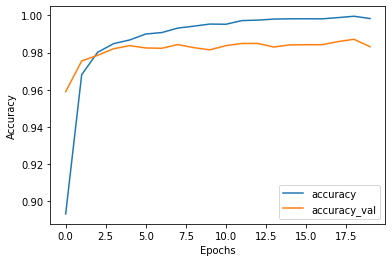

<Figure size 432x288 with 0 Axes>

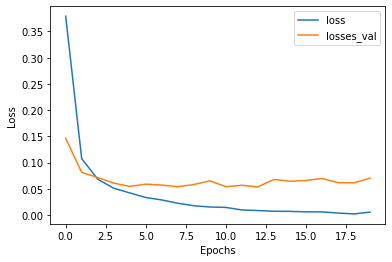

In [16]:
plot_history2(nertwork_history3)

In [17]:
test_loss, test_acc = myModel.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0573 - accuracy: 0.9860


In [18]:
test_lable_p = myModel.predict(X_test)

In [19]:
import numpy as np 
test_lable_p = np.argmax(test_lable_p , axis=1,)# اکسیس را مساوی با یک قرار می دهیم یعنی فقط اندیکیس (مکان) ماکسیمم مقدار در هر ردیف افقی را بگیر 
test_lable_p

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
difrent=[]
for i in range(0,test_labels.shape[0]):
  if test_labels[i] != test_lable_p[i] :
    difrent.append(1)
print('of 10000:',len(difrent))

of 10000: 140


In [21]:
print(test_labels[5])
test_lable_p[5]

1


1